In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv')
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

msk = np.random.rand(len(df)) < .8
train = cdf[msk]
test = cdf[~msk]

REGRESION POLINOMICA

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Asignacion de datos en variables
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# Creacion del objeto para la regresion
poly = PolynomialFeatures(degree=2)

# "fit_transform()" toma cada dato y lo devuelve como una lista del mismo elevado a la potencia desde 0 hasta el grado que se desee en 'degree'
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [23]:
# Creacion del oibjeto para la regresion
linear_reg = LinearRegression()

# Entranamiento del modelo
linear_reg.fit(train_x_poly,train_y)

print("Coefficients:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)

Coefficients: [[ 0.         50.15642846 -1.40080464]]
Intercept: [106.69226067]


Text(0, 0.5, 'Emission')

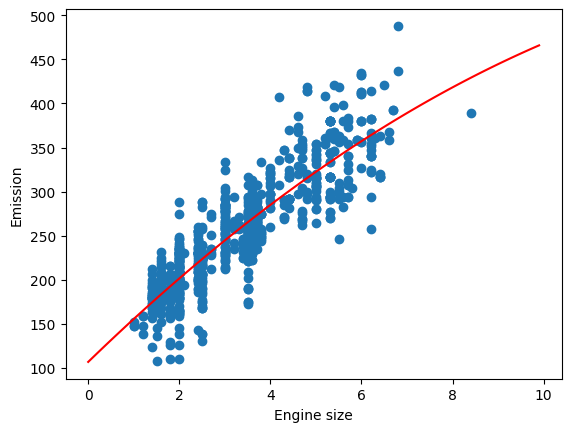

In [11]:
# Graficacion de los puntos
plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'])

# Creacion de caracteristicas para linea de regresion
XX = np.arange(0.0,10.0,0.1)
yy = linear_reg.intercept_[0] + linear_reg.coef_[0][1]*XX + linear_reg.coef_[0][2]*np.power(XX,2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [12]:
# Evaluacion

from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = linear_reg.predict(test_x_poly)

print("MAE: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("RMSE: %.2f" % np.mean((test_y_ - test_y)**2))
print("R^2: %.2f" % r2_score(test_y,test_y_))

MAE: 23.85
RMSE: 982.17
R^2: 0.76


Coeficientes: [[ 0.         34.78997305  2.93507693 -0.36874647]]
Intercepto: [122.68191444]
MAE: 23.70
RMSE: 970.87
R^2: 0.76


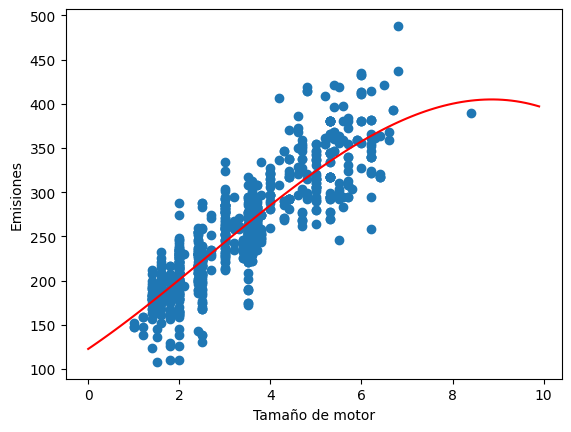

In [22]:
# write your code here
poly_ = PolynomialFeatures(degree=3)
train_x_poly_ = poly_.fit_transform(train_x)

linear = LinearRegression()
train_y_ = linear.fit(train_x_poly_,train_y)

print('Coeficientes:',linear.coef_)
print('Intercepto:',linear.intercept_)

plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"])
XX1 = np.arange(0.0,10.0,0.1)
YY1 = linear.intercept_[0] + linear.coef_[0][1]*XX1 + linear.coef_[0][2]*np.power(XX1,2) + linear.coef_[0][3]*np.power(XX1,3)
plt.plot(XX1,YY1,'-r')
plt.xlabel("Tamaño de motor")
plt.ylabel("Emisiones")

# Evaluacion
test_x_pol = poly_.transform(test_x)
testy_ = linear.predict(test_x_pol)

print("MAE: %.2f" % np.mean(np.absolute(testy_ - test_y)))
print("RMSE: %.2f" % np.mean((testy_ - test_y)**2))
print("R^2: %.2f" % r2_score(test_y,testy_))

